<a href="https://colab.research.google.com/github/LimKyeongmuk/CNN-Architecture/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, add, Flatten, GlobalAveragePooling2D, Reshape, multiply
from keras.models import Model

import numpy as np
import tensorflow as tf
from keras.utils import np_utils

width = 32
height = 32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 6s 0us/step


In [2]:
y_train.shape

(50000, 1)

In [3]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
y_train.shape

(50000, 10)

In [5]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [6]:
y_train.shape

(50000, 10)

In [10]:
def Residual_Block(x, filter):

    x_skip = x 
    f= filter

    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x_skip = Conv2D(f, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)    

    x = add([x, x_skip])
    x = Activation('relu')(x)    
    
    return x


In [11]:
def Residual_Block_50(x, filters):
    f1, f2 = filters
    x_skip = x # 초기의 x

    x = Conv2D(f1, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f1, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x_skip = Conv2D(f2, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)    

    x = add([x, x_skip])
    x = Activation('relu')(x)    
    return x

https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/resnet.py

In [12]:

inputs = Input(shape=(32,32,3))
x = Conv2D(64, kernel_size=7, strides=2, padding='valid')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)


# x = Residual_Block(x, filter = 64)
# x = Residual_Block(x, filter = 64)

# x = Residual_Block(x, filter = 128)
# x = Residual_Block(x, filter = 128)

# x = Residual_Block(x, filter = 256)
# x = Residual_Block(x, filter = 256)

# x = Residual_Block(x, filter = 512)
# x = Residual_Block(x, filter = 512)

for i in range (3):
  x = Residual_Block_50(x, filters = (64,256))

for i in range (3):
  x = Residual_Block_50(x, filters = (128,512))

for i in range (3):
  x = Residual_Block_50(x, filters = (256,1024))

for i in range (3):
  x = Residual_Block_50(x, filters = (512,2048))

x = GlobalAveragePooling2D()(x) 

outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 13, 13, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 7, 7, 64)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     4160        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [13]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [14]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

In [ ]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 141s 69ms/step - loss: 2.0304 - accuracy: 0.2633 - val_loss: 2.3032 - val_accuracy: 0.2800
Epoch 2/10
1547/1547 [==============================] - 106s 68ms/step - loss: 1.5488 - accuracy: 0.4421 - val_loss: 1.4640 - val_accuracy: 0.4600
Epoch 3/10
1547/1547 [==============================] - 106s 68ms/step - loss: 1.3423 - accuracy: 0.5234 - val_loss: 1.2788 - val_accuracy: 0.5740
Epoch 4/10
1547/1547 [==============================] - 106s 68ms/step - loss: 1.1956 - accuracy: 0.5720 - val_loss: 1.3850 - val_accuracy: 0.5080
Epoch 5/10
1547/1547 [==============================] - 106s 68ms/step - loss: 1.0669 - accuracy: 0.6257 - val_loss: 1.1778 - val_accuracy: 0.6000
Epoch 6/10
1547/1547 [==============================] - 105s 68ms/step - loss: 0.9819 - accuracy: 0.6532 - val_loss: 1.9569 - val_accuracy: 0.4200
Epoch 7/10
1547/1547 [==============================] - 106s 68ms/step - loss: 0.8969 - accuracy: 0.6850 - val_loss: 1

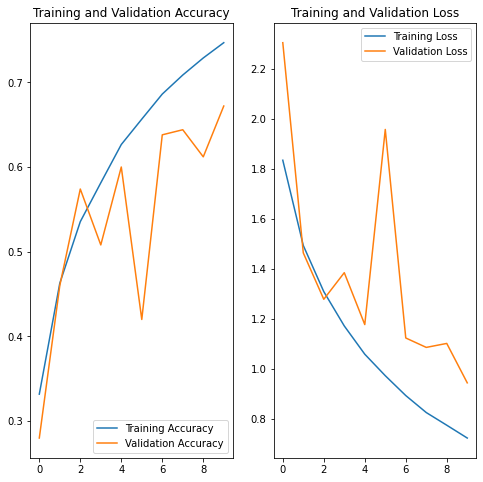

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()